In [32]:
# Supervised ML
# Regression -- Simple Linear Regression

# First Machine Learning Project : Predict Student Marks Based On Number Of Hours Studied

# Import All Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
# Stage 1 : Data Gathering
data = pd.read_csv('https://raw.githubusercontent.com/yash240990/Python/master/Grade_Set_1.csv')
data

,Hours_Studied,Test_Grade,Status,Result
0,2,57,fail,D
1,3,66,fail,D
2,4,73,pass,C
3,5,76,pass,C
4,6,79,pass,C
5,7,81,pass,B
6,8,90,pass,B
7,9,96,pass,A
8,10,100,pass,A


In [34]:
# Stage 2 : EDA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Hours_Studied  9 non-null      int64 
 1   Test_Grade     9 non-null      int64 
 2   Status         9 non-null      object
 3   Result         9 non-null      object
dtypes: int64(2), object(2)
memory usage: 420.0+ bytes


In [35]:
# Stage 3 : Data Preparation
# a.) check for missing values
# b.) check for duplicate records
# c.) convert non-numerical features into numerical features
# d.) normalization
# e.) select independent and dependent variable

In [36]:
# a.) check for missing values
data.isnull().sum()

,0
Hours_Studied,0
Test_Grade,0
Status,0
Result,0


In [37]:
# b.) check for duplicate records
data.duplicated().sum()

np.int64(0)

In [38]:
# c.) convert non-numerical features into numerical features
import sklearn.preprocessing as pp
lb = pp.LabelBinarizer()

data.Status = lb.fit_transform(data.Status)

# fail --> 0
# pass --> 1

In [39]:
# d.) normalization

# Normalization is a part of data preparation

# The goal of normalization is to change the values of numeric
# columns in to a common scale of [0 and 1]

# we need Normalization only when features are in a Different Range

# when you normalize your data you're not changing its meaning --> you're just changing its scale
# so that model can learn efficiently

# after Normalization features are on comparable scale

# 45000  <--> 0.0422
# model trains on 0.0422 instead of 45000

# For machine learning, every dataset does not require normalization. It is
# required only when features have different ranges.


'''

age   income     normalizedValues

16     45000        0.0422
17     67000        0.1136
18     32000
19     78000
20     100000
21     340000

income   Xmax == 340000    Xmin == 32000   x = 45000

    X - Xmin                    45000 - 32000
  --------------    ==>       ----------------  ==> 0.0422
   Xmax - Xmin                 340000 - 32000



income   Xmax == 340000    Xmin == 32000   x = 67000

    X - Xmin                    67000 - 32000
  --------------    ==>       ----------------  ==> 0.1136
   Xmax - Xmin                 340000 - 32000


vals = data.Test_Grade.values
print(vals)

nrmlz = pp.normalize([vals])
print(nrmlz)

'''
print()

In [40]:
# e.) select independent and dependent variable

# Independent Variable
# scikit-learn expects X to be 2D even if you have only one feature

X = data.Hours_Studied.values
X = X.reshape(9,1)
X

array([[ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [41]:
# Dependent Variable
Y = data.Test_Grade.values
Y

array([ 57,  66,  73,  76,  79,  81,  90,  96, 100])

In [42]:
# Stage 4 : Model Development
# Applying a suitable ML Algo On Dataset

import sklearn.linear_model as lm
lin_reg = lm.LinearRegression()

In [43]:
lin_reg.fit(X,Y)

LinearRegression()

In [44]:
import pickle
pickle.dump(lin_reg,open('slr.pkl','wb'))

In [45]:
# Stage 5 : Model Evaluation
data['Predicted_Values'] = lin_reg.predict(X)

In [46]:
data[['Hours_Studied','Test_Grade','Predicted_Values']]

,Hours_Studied,Test_Grade,Predicted_Values
0,2,57,59.711111
1,3,66,64.727778
2,4,73,69.744444
3,5,76,74.761111
4,6,79,79.777778
5,7,81,84.794444
6,8,90,89.811111
7,9,96,94.827778
8,10,100,99.844444


In [47]:
pred_values = lin_reg.predict(X)
print(pred_values)

[59.71111111 64.72777778 69.74444444 74.76111111 79.77777778 84.79444444
 89.81111111 94.82777778 99.84444444]


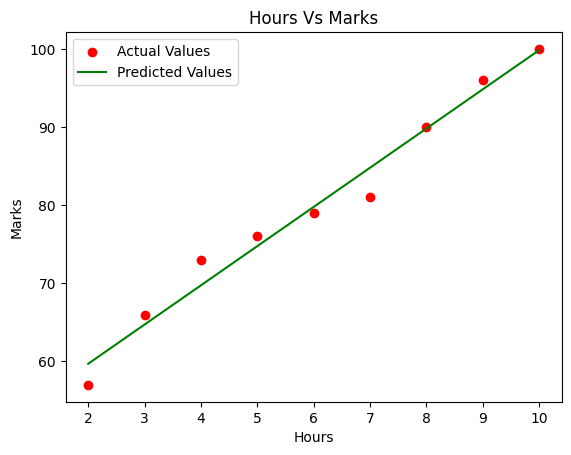

In [48]:
# Plot Actual Values
plt.scatter(X,Y,color='red',label='Actual Values')
# Plot The Predicted Values
plt.plot(X,pred_values,color='green',label='Predicted Values')
plt.title('Hours Vs Marks')
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.legend()
plt.show()

In [49]:
# R-squared
# help you to know how well the explain the data
# or how well the model fits the data

from sklearn.metrics import r2_score
accuracy = r2_score(Y,pred_values)
print('Regression Score Function :',accuracy)
print(f'Regression Score Function : {int(accuracy*100)}%')

Regression Score Function : 0.9757431074095347
Regression Score Function : 97%


In [50]:
# Stage 6 : Final Predictions
hrs = float(input('Enter The Number Of Hours Studied : '))
predict_marks = lin_reg.predict([[hrs]])
print(f'Student Who Studied {hrs} Hours Will Score {int(predict_marks[0])} marks.')

Enter The Number Of Hours Studied : 6
Student Who Studied 6.0 Hours Will Score 79 marks.


In [51]:
hrs = float(input('Enter The Number Of Hours Studied : '))
if hrs>=1 and hrs<=10:
    predict_marks = lin_reg.predict([[hrs]])
    print(f'Student Who Studied {hrs} Hours Will Score {int(predict_marks[0])} marks.')
else:
    print('Note : Machine Learning Model Prediction')
    print('Please Enter The Hours Between 1 Till 10')

Enter The Number Of Hours Studied : 7.5
Student Who Studied 7.5 Hours Will Score 87 marks.
